In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Bank.csv")

In [4]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1) #Dropping the unnecessary columns 

In [5]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [6]:

df = pd.concat([df,gender,states], axis = 1)

In [7]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]

In [8]:
y = df['Exited']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1]:
% pip install keras
from keras import * #Keras is the wrapper on the top of tenserflow
from keras.models import * #Keras is the wrapper on the top of tenserflow
from keras.layers import * #Keras is the wrapper on the top of tenserflow


UsageError: Line magic function `%` not found.


In [2]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers


: 

: 

In [3]:
classifier = Sequential()

NameError: name 'Sequential' is not defined

In [5]:
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

NameError: name 'classifier' is not defined

In [6]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

NameError: name 'classifier' is not defined

In [7]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

NameError: name 'classifier' is not defined

In [ ]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

In [ ]:
classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to training dataset

Epoch 1/50
700/700 [==============================] - 2s 1ms/step - loss: 0.4959 - accuracy: 0.7951
Epoch 2/50
700/700 [==============================] - 1s 974us/step - loss: 0.4280 - accuracy: 0.7954
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.7954
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4187 - accuracy: 0.8104
Epoch 5/50
700/700 [==============================] - 1s 985us/step - loss: 0.4157 - accuracy: 0.8266
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4140 - accuracy: 0.8287
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4121 - accuracy: 0.8306
Epoch 8/50
700/700 [==============================] - 1s 986us/step - loss: 0.4105 - accuracy: 0.8337
Epoch 9/50
700/700 [==============================] - 1s 983us/step - loss: 0.4095 - accuracy: 0.8326
Epoch 10/50
700/700 [==============================] - 1s 979us/step - loss: 0.4083 - accura

In [ ]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8326666666666667

Text(69.0, 0.5, 'Truth')

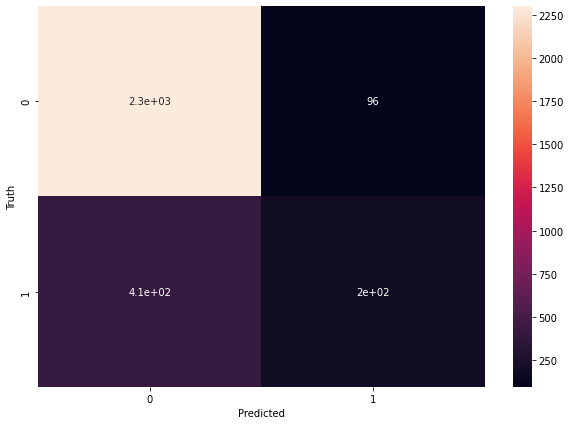

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2395
           1       0.67      0.33      0.44       605

    accuracy                           0.83      3000
   macro avg       0.76      0.64      0.67      3000
weighted avg       0.81      0.83      0.81      3000

